In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=4
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=6


import json
import requests
from pymatgen import MPRester
import pandas as pd
import json
from mendeleev import element
import requests
import numpy as np
import matplotlib.pyplot as plt

from pymatgen.core.structure import Structure
import random


"""
MAKE SURE TO HAVE THE SAME SEED ALWAYS
"""
import matplotlib as mpl
np.random.seed(666)
random.seed(666)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from joblib import Parallel, delayed
from sklearn.base import BaseEstimator, RegressorMixin
from numpy import linalg as LA
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
import itertools
import pandas as pd
from tqdm import tqdm
import numpy as np
sns.set_context("poster")
sns.set_style('whitegrid')
fontsize = 25
plt.rc('font',       size=fontsize)    # controls default text sizes
plt.rc('axes',  titlesize=fontsize)    # fontsize of the axes title
plt.rc('axes',  labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure',titlesize=fontsize)    # fontsize of the figure title
#https://gist.github.com/kiranvad/d6ce5cf49754b0563197e67c605e37e1

1a) 
Write a computer program that follows the time evolution of a single particle inone dimension by repeatingly adding to its positionxrandom numbers∆xdrawnfrom a Gaussian distribution with zero mean and varianceσ2= 1. Calculate10000independent trajectories comprisingN= 100steps each, initiated atx= 0. Usethis data set to do the following

 Calculate〈x2〉as a function of the number of steps taken and plot it togetherwith the theoretical result. Name_P1_1a.png

In [2]:
Ntrj = 10000
n    = 100

all_trj = []
for i in tqdm(range(Ntrj)):
    curr_trj = [0]
    for t in range(n):

        curr_trj.append(curr_trj[-1]+np.random.normal(loc = 0, scale=1.0))
    all_trj.append(curr_trj)

all_trj     = np.array(all_trj)
avg_trj     = np.average(all_trj, axis =0)
avg_sq_trj  = np.average(all_trj*all_trj, axis =0)


100%|██████████| 10000/10000 [00:04<00:00, 2363.32it/s]


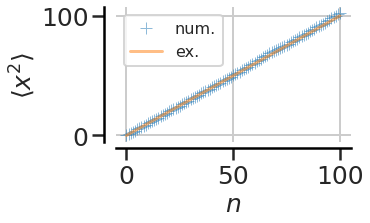

In [5]:
fig,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))
ax.plot(avg_sq_trj,'+', label='num.',alpha=0.5)
ax.plot(np.linspace(0, 100),np.linspace(0, 100),alpha=0.5 , label="ex." )


ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$\langle x^2 \rangle $")
ax.legend(fontsize=fontsize-9)
fig.tight_layout(h_pad=0.0, pad=1.5)
plt.savefig('./figures/JanWeinreich_P1_1a.png')

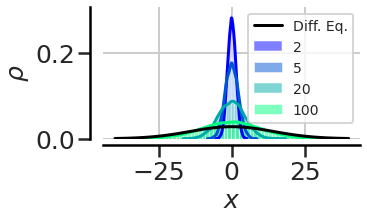

In [7]:
fig,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))


def solution_diff(x, t):
    D   = 1 #0.5
    Nf  = 1.0 /( np.sqrt(4.0*np.pi*D*t))
    fac = np.exp(-    (x**2/(4.0*D*t)))
    return Nf * fac

n_sel = [2, 5, 20, 100]
NCURVES=len(n_sel)
colors=plt.cm.winter(np.linspace(0,1,NCURVES))


for ind, n in enumerate(n_sel):
    #sns.histplot(all_trj[:,n], color=colors[ind],cbar=False,  kde=True, ax=ax)
    sns.histplot(all_trj[:,n], color=colors[ind],  kde=True,stat='density', ax=ax, label= n)

plt.plot(np.linspace(-40, 40), solution_diff(np.linspace(-40, 40), 100.0) , color= 'black', label='Diff. Eq.' )
plt.legend(ncol=1, fontsize = 14)
ax.set_xlabel(r"$x $")
ax.set_ylabel(r"$\rho$")
fig.tight_layout(h_pad=0.0, pad=1.5)
plt.savefig('./figures/JanWeinreich_P1_1b.png')

In [9]:
Ntrj = 10000
n    = 1000

all_trj = []
for i in tqdm(range(Ntrj)):
    curr_trj = [0]
    for t in range(n):

        curr_trj.append(curr_trj[-1]+random.choice(np.array([-1, 1])))
    all_trj.append(curr_trj)

all_trj     = np.array(all_trj)
avg_trj     = np.average(all_trj, axis =0)
avg_sq_trj  = np.average(all_trj*all_trj, axis =0)

100%|██████████| 10000/10000 [00:24<00:00, 401.22it/s]


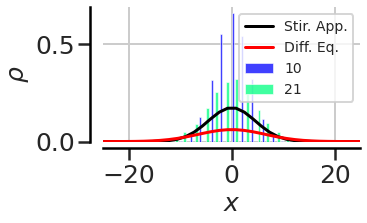

In [25]:
import scipy 
from scipy.special import binom
fig,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))


def solution_stirling(m, N):
    
    #Nf  = 2.0 /( np.sqrt(2.0*np.pi*N))
    #fac = np.exp(-    (m**2/(2.0*N)))

    Nf  = 2.0 /( np.sqrt(2.0*np.pi*N))
    fac = np.exp(-    (m**2/(2.0*N)))    
    return Nf * fac
    #return np.sqrt((2*m)/np.pi)
    #(1/(2**N))*binom(N, m)





n_sel = [10, 21]
NCURVES=len(n_sel)
colors=plt.cm.winter(np.linspace(0,1,NCURVES))


for ind, n in enumerate(n_sel):
    #sns.histplot(all_trj[:,n], color=colors[ind],cbar=False,  kde=True, ax=ax)
    sns.histplot(all_trj[:,n], color=colors[ind],  kde=False,stat='density', ax=ax, label= n)

plt.plot(np.linspace(-40, 40), solution_stirling(np.linspace(-40, 40), 21.0) , color= 'black', label='Stir. App.' )
plt.plot(np.linspace(-40, 40), solution_diff(np.linspace(-40, 40), 21.0)     , color= 'red', label='Diff. Eq.' )

#they only differ by a factor 2 of magnitude


plt.xlim(-25, 25)
plt.legend(ncol=1, fontsize = 14)
ax.set_xlabel(r"$x $")
ax.set_ylabel(r"$\rho$")
fig.tight_layout(h_pad=0.0, pad=1.5)
plt.savefig('./figures/JanWeinreich_P1_2b.png')

In [5]:
def getcolumn(filename, column, mode='float'):
    dat=np.loadtxt(filename , usecols=column, dtype=mode)
    return dat


file = 'weirdwalker.dat'
x, y = getcolumn(file, 0, mode='float'), getcolumn(file, 1, mode='float')

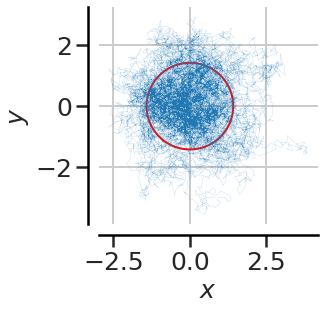

In [27]:

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))
#https://upload.wikimedia.org/wikipedia/commons/d/d5/Msd_differentregimes_de.svg
#https://de.wikipedia.org/wiki/Mittlere_quadratische_Verschiebung
ax.plot(x[:12100], y[:12100], "-", lw=0.1)

ax.set_xlabel(r"$x $")
ax.set_ylabel(r"$y$")
circle1  = plt.Circle((0, 0), np.sqrt(2), color='r' ,fill=False)
ax.add_artist(circle1)
plt.savefig("./figures/trajectory_weirdwalker.png", bbox_inches='tight')
#plt.show()

100%|██████████| 400001/400001 [02:15<00:00, 2942.80it/s]


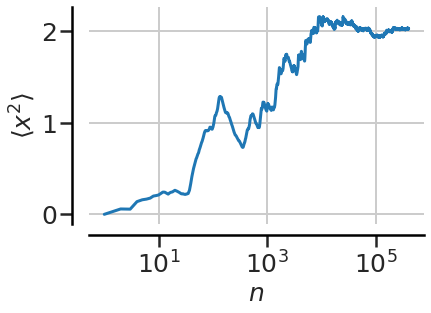

In [28]:
#MSD  = np.array([ x[:ind]**2.0 + y[:ind]**2.0 for ind in range(len(x))])
#MSD  = np.array([ x[:ind]**2.0 + y[:ind]**2.0 for ind in range(100)])
#, avg_sq_trj_y  = np.average(x*x), np.average(y*y)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))

MSD = []
#for ind in tqdm(range(len(x))):
#this is an example for a confined diffusion!
#https://upload.wikimedia.org/wikipedia/commons/d/d5/Msd_differentregimes_de.svg
#https://galileo.phys.virginia.edu/classes/152.mf1i.spring02/RandomWalk.htm
for ind in tqdm(range(len(x))):
    MSD.append(    np.average(     abs(x[:ind]**2.0 + y[:ind]**2.0) , axis=0   ))

    



MSD = np.array(MSD)
plt.xscale('log')
ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$\langle x^2 \rangle $")
plt.plot(MSD)
plt.savefig("./figures/msd_weirdwalker.png", bbox_inches='tight')



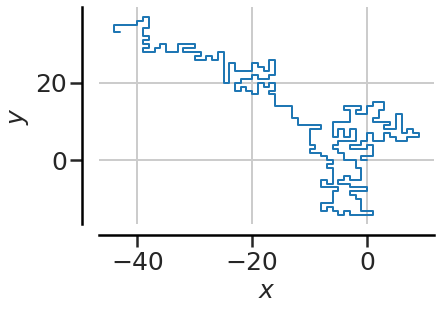

In [6]:
file = 'strangewalkers.dat'
x, y = getcolumn(file, 0, mode='float'), getcolumn(file, 1, mode='float')

x , y = x.reshape( (int(1404000/351), 351)) , y.reshape( (int(1404000/351), 351))

fig, ax = plt.subplots()
#ax.set_aspect('equal', adjustable='box')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))
#https://upload.wikimedia.org/wikipedia/commons/d/d5/Msd_differentregimes_de.svg
#https://de.wikipedia.org/wiki/Mittlere_quadratische_Verschiebung
ax.plot(x[4], y[4], "-", lw=2)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
#circle1  = plt.Circle((0, 0), np.sqrt(2), color='r' ,fill=False)
#ax.add_artist(circle1)
plt.savefig("./figures/test.png", bbox_inches='tight')
#plt.show()

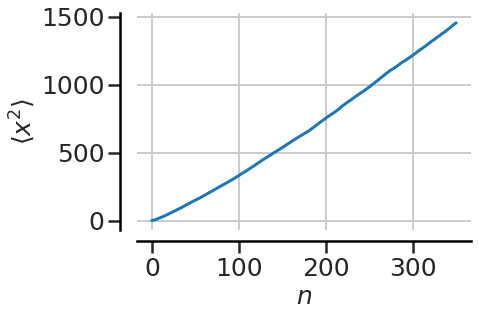

In [7]:
avg_sq_trj_x , avg_sq_trj_y = np.average(x*x, axis =0), np.average(y*y, axis =0)
fig,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))

#plt.yscale('log')
#plt.xscale('log')
ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$\langle x^2 \rangle $")
plt.plot(avg_sq_trj_x + avg_sq_trj_y)
plt.savefig("./figures/msd_strangewalker.png", bbox_inches='tight')

In [25]:

(avg_sq_trj_x + avg_sq_trj_y)[100]

330.68399999999997

In [189]:
slope is 2 thus D  = 2 with
{\displaystyle {\text{MSD}}=2nDt}.

SyntaxError: invalid syntax (<ipython-input-189-78e3d6ae7e0d>, line 1)

In [ ]:
http://www.math.nagoya-u.ac.jp/~richard/teaching/s2019/Cauchy_Distribution.pdf

<AxesSubplot:ylabel='Count'>

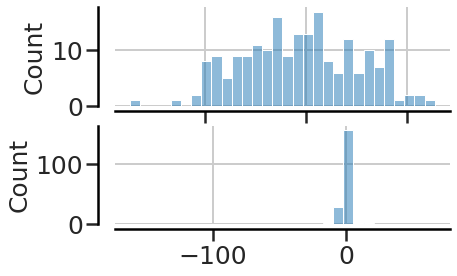

In [14]:
samples_cauchy = []
samples_gaussian = []
for n in range(200):
    samples_cauchy.append(np.random.standard_cauchy())
    samples_gaussian.append(np.random.normal())

fig,ax = plt.subplots((2))
for axi in ax:
    axi.spines['right'].set_color('none')
    axi.spines['top'].set_color('none')
    axi.spines['bottom'].set_position(('axes', -0.05))
    axi.spines['bottom'].set_color('black')
    axi.spines['left'].set_color('black')
    axi.yaxis.set_ticks_position('left')
    axi.xaxis.set_ticks_position('bottom')
    axi.spines['left'].set_position(('axes', -0.05))
    


sns.histplot(samples_gaussian,bins=30,  alpha=0.5, ax=ax[0])
sns.histplot(samples_cauchy, bins=30, alpha=0.5, ax=ax[1])
#for axi in ax:
#    axi.set_xlim(-10, 100)

In [8]:
Ntrj = 10
n    = 200

all_trj = []
for i in tqdm(range(Ntrj)):
    curr_trj = [0]
    for t in range(n):

        curr_trj.append(curr_trj[-1]+np.random.standard_cauchy())
    all_trj.append(curr_trj)

all_trj     = np.array(all_trj)

100%|██████████| 10/10 [00:00<00:00, 5397.38it/s]


In [63]:
all_trj.shape

(10, 201)

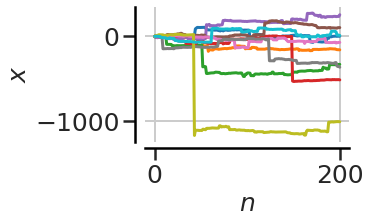

In [15]:
fig,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))

for t in all_trj:
    ax.plot(t)

ax.set_xlabel("$n$")    
ax.set_ylabel("$x$")   
fig.tight_layout(h_pad=0.0, pad=1.5) 
plt.savefig('./figures/JanWeinreich_P1_4a.png')

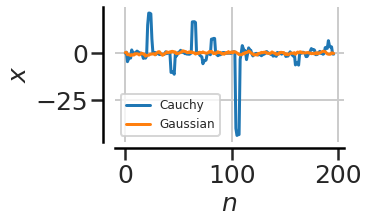

In [22]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)



fig,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))

ax.set_xlabel("$n$")    
ax.set_ylabel("$x$")  

ax.plot(running_mean(samples_cauchy, 4), label='Cauchy')
ax.plot(running_mean(samples_gaussian, 4), label='Gaussian')
ax.legend(fontsize=fontsize-13)
fig.tight_layout(h_pad=0.0, pad=1.5) 
plt.savefig('./figures/JanWeinreich_P1_4b.png')

100%|██████████| 50000/50000 [00:05<00:00, 9688.58it/s] 


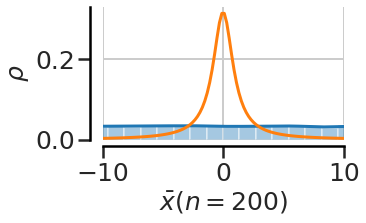

In [29]:
Ntrj = 50000
n    = 100

all_avgs = []
for i in tqdm(range(Ntrj)):
    curr_trj = [0]
    for t in range(n):
        curr_trj.append(curr_trj[-1]+np.random.standard_cauchy())

    all_avgs.append(np.mean(curr_trj))

all_avgs = np.array(all_avgs)  

def cauchy_fct(x):
    denom = np.pi * ( 1 + x**2.0)
    return 1/denom

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position(('axes', -0.05))

ax.set_ylabel("$\\rho$")    
ax.set_xlabel("$\\bar{x}(n=200)$") 

all_avgs = all_avgs[(all_avgs>-15) & (all_avgs<15)]
sns.distplot(all_avgs, ax=ax)
ax.plot(np.linspace(-10, 10, 100), cauchy_fct(np.linspace(-10, 10, 100)))
plt.xlim(-10, 10)

fig.tight_layout(h_pad=0.0, pad=1.5) 
plt.savefig('./figures/JanWeinreich_P1_4c.png')

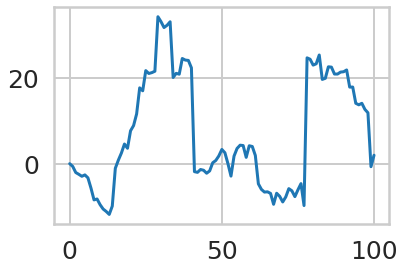

In [72]:
plt.plot(curr_trj)

In [73]:
np.mean(curr_trj)

7.096655832247283